In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,accuracy_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

In [ ]:
dftrain = pd.read_csv('https://raw.githubusercontent.com/ilhamaf22/kuliah/main/Train.csv', header=None, sep=',')

In [ ]:
dftrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,ID,Provinsi,KodeKabKot,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
1,1,11,1101,0,1,27,0,0,1,1,1.077,15.075,26.919,390.869
2,2,11,1101,0,1,38,0,0,1,0,1.077,15.075,26.919,390.869
3,4,11,1101,0,0,36,0,0,0,1,1.077,15.075,26.919,390.869
4,7,11,1101,0,0,27,0,0,1,1,1.077,15.075,26.919,390.869


In [ ]:
dftest = pd.read_csv('https://raw.githubusercontent.com/ilhamaf22/kuliah/main/Test.csv', header=None, sep=',')

In [ ]:
dftest.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,ID,Provinsi,KodeKabKot,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
1,3,11,1101,1,39,0,0,1,1,1.077,15.075,26.919,390.869
2,5,11,1101,0,32,1,0,1,1,1.077,15.075,26.919,390.869
3,6,11,1101,1,32,1,0,1,1,1.077,15.075,26.919,390.869
4,10,11,1101,1,28,1,0,1,0,1.077,15.075,26.919,390.869


In [ ]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13627 entries, 0 to 13626
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       13627 non-null  object
 1   1       13627 non-null  object
 2   2       13627 non-null  object
 3   3       13627 non-null  object
 4   4       13627 non-null  object
 5   5       13627 non-null  object
 6   6       13627 non-null  object
 7   7       13627 non-null  object
 8   8       13627 non-null  object
 9   9       13627 non-null  object
 10  10      13627 non-null  object
 11  11      13627 non-null  object
 12  12      13627 non-null  object
 13  13      13622 non-null  object
dtypes: object(14)
memory usage: 1.5+ MB


In [ ]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5907 entries, 0 to 5906
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5907 non-null   object
 1   1       5907 non-null   object
 2   2       5907 non-null   object
 3   3       5907 non-null   object
 4   4       5907 non-null   object
 5   5       5907 non-null   object
 6   6       5907 non-null   object
 7   7       5907 non-null   object
 8   8       5907 non-null   object
 9   9       5907 non-null   object
 10  10      5907 non-null   object
 11  11      5907 non-null   object
 12  12      5902 non-null   object
dtypes: object(13)
memory usage: 600.1+ KB


In [ ]:
id = dftest[0]

In [ ]:
dftrain = dftrain.drop(0, axis=1)

In [ ]:
dftest = dftest.drop(0, axis=1)

In [ ]:
dftest

,1,2,3,4,5,6,7,8,9,10,11,12
0,Provinsi,KodeKabKot,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
1,11,1101,1,39,0,0,1,1,1.077,15.075,26.919,390.869
2,11,1101,0,32,1,0,1,1,1.077,15.075,26.919,390.869
3,11,1101,1,32,1,0,1,1,1.077,15.075,26.919,390.869
4,11,1101,1,28,1,0,1,0,1.077,15.075,26.919,390.869
...,...,...,...,...,...,...,...,...,...,...,...,...
5902,94,9471,1,39,0,1,1,1,1.757,3.262,48.936,209.045
5903,94,9471,0,30,1,1,1,1,1.757,3.262,48.936,209.045
5904,94,9471,0,22,1,1,1,1,1.757,3.262,48.936,209.045
5905,94,9471,0,40,1,1,1,1,1.757,3.262,48.936,209.045


In [ ]:
header = ['Provinsi','Kode','Y','X1','X2','X3','X4','X5','X6','Z1','Z2','Z3','Z4']
headertest = ['Provinsi','Kode','X1','X2','X3','X4','X5','X6','Z1','Z2','Z3','Z4']

In [ ]:
dftrain = dftrain[1:]
dftrain.columns = header
dftrain.reset_index(inplace=True, drop=True)

In [ ]:
dftrain

,Provinsi,Kode,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,11,1101,0,1,27,0,0,1,1,1.077,15.075,26.919,390.869
1,11,1101,0,1,38,0,0,1,0,1.077,15.075,26.919,390.869
2,11,1101,0,0,36,0,0,0,1,1.077,15.075,26.919,390.869
3,11,1101,0,0,27,0,0,1,1,1.077,15.075,26.919,390.869
4,11,1101,0,1,36,1,0,0,0,1.077,15.075,26.919,390.869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,94,9471,1,0,28,1,0,1,1,1.757,3.262,48.936,209.045
13622,94,9471,0,1,22,1,1,1,1,1.757,3.262,48.936,209.045
13623,94,9471,0,0,35,1,0,1,1,1.757,3.262,48.936,209.045
13624,94,9471,0,0,27,1,0,1,1,1.757,3.262,48.936,209.045


In [ ]:
dftest = dftest[1:]
dftest.columns = headertest
dftest.reset_index(inplace=True, drop=True)

In [ ]:
dftest

,Provinsi,Kode,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,11,1101,1,39,0,0,1,1,1.077,15.075,26.919,390.869
1,11,1101,0,32,1,0,1,1,1.077,15.075,26.919,390.869
2,11,1101,1,32,1,0,1,1,1.077,15.075,26.919,390.869
3,11,1101,1,28,1,0,1,0,1.077,15.075,26.919,390.869
4,11,1101,0,31,1,0,1,1,1.077,15.075,26.919,390.869
...,...,...,...,...,...,...,...,...,...,...,...,...
5901,94,9471,1,39,0,1,1,1,1.757,3.262,48.936,209.045
5902,94,9471,0,30,1,1,1,1,1.757,3.262,48.936,209.045
5903,94,9471,0,22,1,1,1,1,1.757,3.262,48.936,209.045
5904,94,9471,0,40,1,1,1,1,1.757,3.262,48.936,209.045


In [ ]:
dftrain.Provinsi.value_counts()

33    966
12    959
35    953
32    892
73    666
53    648
11    631
94    585
13    503
74    479
18    460
16    411
91    379
61    355
14    353
81    344
62    326
52    320
72    307
63    302
71    289
36    282
82    254
64    236
15    236
17    214
51    210
76    193
31    193
19    167
21    154
75    132
65    132
34     95
Name: Provinsi, dtype: int64

In [ ]:
dftrain.Kode.value_counts()

7306    61
3329    53
9106    50
3211    49
3603    49
        ..
3471     6
9434     5
9433     5
9435     5
9430     1
Name: Kode, Length: 514, dtype: int64

In [ ]:
Xtrain = dftrain.drop("Y",axis=1)

In [ ]:
kategorik = ['Provinsi','Kode','X1','X2','X3','X4','X5']

In [ ]:
dftrain.X2.value_counts()

30    787
29    778
28    746
31    742
26    736
27    727
34    712
32    703
25    665
33    640
35    615
24    609
36    569
37    564
23    531
22    459
38    410
21    388
39    383
40    361
20    318
41    239
19    199
42    173
18    124
43    115
44     98
45     68
17     46
46     36
47     22
16     11
49     10
50      9
48      9
54      7
15      6
52      5
51      3
53      2
14      1
Name: X2, dtype: int64

In [ ]:
dftrain['X2'] = dftrain['X2'].replace(['10','11','12','13','14','15','16','17','18','19'],['k1','k1','k1','k1','k1','k1','k1','k1','k1','k1'])
dftrain['X2'] = dftrain['X2'].replace(['20','21','22','23','24','25','26','27','28','29'],['k2','k2','k2','k2','k2','k2','k2','k2','k2','k2'])
dftrain['X2'] = dftrain['X2'].replace(['30','31','32','33','34','35','36','37','38','39'],['k3','k3','k3','k3','k3','k3','k3','k3','k3','k3'])
dftrain['X2'] = dftrain['X2'].replace(['40','41','42','43','44','45','46','47','48','49'],['k4','k4','k4','k4','k4','k4','k4','k4','k4','k4'])
dftrain['X2'] = dftrain['X2'].replace(['50','51','52','53','54','55','56','57','58','59'],['k5','k5','k5','k5','k5','k5','k5','k5','k5','k5'])

In [ ]:
dftest['X2'] = dftest['X2'].replace(['10','11','12','13','14','15','16','17','18','19'],['k1','k1','k1','k1','k1','k1','k1','k1','k1','k1'])
dftest['X2'] = dftest['X2'].replace(['20','21','22','23','24','25','26','27','28','29'],['k2','k2','k2','k2','k2','k2','k2','k2','k2','k2'])
dftest['X2'] = dftest['X2'].replace(['30','31','32','33','34','35','36','37','38','39'],['k3','k3','k3','k3','k3','k3','k3','k3','k3','k3'])
dftest['X2'] = dftest['X2'].replace(['40','41','42','43','44','45','46','47','48','49'],['k4','k4','k4','k4','k4','k4','k4','k4','k4','k4'])
dftest['X2'] = dftest['X2'].replace(['50','51','52','53','54','55','56','57','58','59'],['k5','k5','k5','k5','k5','k5','k5','k5','k5','k5'])

In [ ]:
#jalankan sel ini jika terdapat error tidak ada fancyimpute
!pip install fancyimpute

     |████████████████████████████████| 154 kB 7.7 MB/s 
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29899 sha256=09ef8cd6d56d1e6bf639dba73ed73ea673cd87d26c588b033a4d782f36001134
  Stored in directory: /root/.cache/pip/wheels/e3/04/06/a1a7d89ef4e631ce6268ea2d8cde04f7290651c1ff1025ce68
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11353 sha256=2005bb681d9d34f9f3a7012c3d78b887ed22d7e741f34d226c7b12b1fe78df79
  Stored in directory: /root/.cache/pip/wheels/72/21/a8/a045cacd9838abd5643f6bfa852c0796a99d6b1494760494e0
Successfully built fancyimpute knnimpute


In [ ]:
# Impor library untuk proses encode dan imputasi
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN

# Membuat dictionary untuk kumpulan Ordinal Encoder dari setiap kolom
ordinal_enc_dict = {}
# Membuat data frame dengan ukuran yang sama untuk meletakkan hasil imputasi
imputed = Xtrain.copy(deep=True)
# Melakukan iterasi encode untuk setiap kolom bertipe kategorik 
for col_name in kategorik:
    # Membuat ordinal encoder untuk setiap kolom dan menyimpannya pada dictionary
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    # Mengambil kolom kategorik tertentu
    col = Xtrain[col_name]
    # Mengambil data-data pada kolom tersebut yang tidak null
    col_not_null = col[col.notnull()]
    # Merubah ukuran data-data yang tidak null menjadi vektor
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    # Melakukan encode data-data yang tidak null dari kolom tersebut menjadi numerik
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    # Memasukkan hasil encode kolom tersebut pada data frame yang ukurannya sama dengan data awal
    imputed.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)
# Membuat KNN Imputer dengan k=13
KNN_imputer = KNN(k=13)
# Melakukan imputasi data yang hilang dengan KNN Imputer
imputed.iloc[:, :] = KNN_imputer.fit_transform(imputed)

Imputing row 1/13626 with 0 missing, elapsed time: 29.655
Imputing row 101/13626 with 0 missing, elapsed time: 29.656
Imputing row 201/13626 with 0 missing, elapsed time: 29.657
Imputing row 301/13626 with 0 missing, elapsed time: 29.657
Imputing row 401/13626 with 0 missing, elapsed time: 29.658
Imputing row 501/13626 with 0 missing, elapsed time: 29.658
Imputing row 601/13626 with 0 missing, elapsed time: 29.659
Imputing row 701/13626 with 0 missing, elapsed time: 29.659
Imputing row 801/13626 with 0 missing, elapsed time: 29.660
Imputing row 901/13626 with 0 missing, elapsed time: 29.660
Imputing row 1001/13626 with 0 missing, elapsed time: 29.661
Imputing row 1101/13626 with 0 missing, elapsed time: 29.661
Imputing row 1201/13626 with 0 missing, elapsed time: 29.662
Imputing row 1301/13626 with 0 missing, elapsed time: 29.662
Imputing row 1401/13626 with 0 missing, elapsed time: 29.663
Imputing row 1501/13626 with 0 missing, elapsed time: 29.663
Imputing row 1601/13626 with 0 missi

In [ ]:
imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13626 entries, 0 to 13625
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  13626 non-null  float64
 1   Kode      13626 non-null  float64
 2   X1        13626 non-null  float64
 3   X2        13626 non-null  float64
 4   X3        13626 non-null  float64
 5   X4        13626 non-null  float64
 6   X5        13626 non-null  float64
 7   X6        13626 non-null  float64
 8   Z1        13626 non-null  float64
 9   Z2        13626 non-null  float64
 10  Z3        13626 non-null  float64
 11  Z4        13626 non-null  float64
dtypes: float64(12)
memory usage: 1.2 MB


In [ ]:
ytrain = dftrain["Y"]

In [ ]:
dftrain

,Provinsi,Kode,Y,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,11,1101,0,1,k2,0,0,1,1,1.077,15.075,26.919,390.869
1,11,1101,0,1,k3,0,0,1,0,1.077,15.075,26.919,390.869
2,11,1101,0,0,k3,0,0,0,1,1.077,15.075,26.919,390.869
3,11,1101,0,0,k2,0,0,1,1,1.077,15.075,26.919,390.869
4,11,1101,0,1,k3,1,0,0,0,1.077,15.075,26.919,390.869
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13621,94,9471,1,0,k2,1,0,1,1,1.757,3.262,48.936,209.045
13622,94,9471,0,1,k2,1,1,1,1,1.757,3.262,48.936,209.045
13623,94,9471,0,0,k3,1,0,1,1,1.757,3.262,48.936,209.045
13624,94,9471,0,0,k2,1,0,1,1,1.757,3.262,48.936,209.045


In [ ]:
imputed

,Provinsi,Kode,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,0.0,0.0,1.0,13.0,0.0,0.0,1.0,1.0,1.077,15.075,26.919,390.869
1,0.0,0.0,1.0,24.0,0.0,0.0,1.0,0.0,1.077,15.075,26.919,390.869
2,0.0,0.0,0.0,22.0,0.0,0.0,0.0,1.0,1.077,15.075,26.919,390.869
3,0.0,0.0,0.0,13.0,0.0,0.0,1.0,1.0,1.077,15.075,26.919,390.869
4,0.0,0.0,1.0,22.0,1.0,0.0,0.0,0.0,1.077,15.075,26.919,390.869
...,...,...,...,...,...,...,...,...,...,...,...,...
13621,33.0,513.0,0.0,14.0,1.0,0.0,1.0,1.0,1.757,3.262,48.936,209.045
13622,33.0,513.0,1.0,8.0,1.0,1.0,1.0,1.0,1.757,3.262,48.936,209.045
13623,33.0,513.0,0.0,21.0,1.0,0.0,1.0,1.0,1.757,3.262,48.936,209.045
13624,33.0,513.0,0.0,13.0,1.0,0.0,1.0,1.0,1.757,3.262,48.936,209.045


In [ ]:
# Impor library untuk proses encode dan imputasi
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN

# Membuat dictionary untuk kumpulan Ordinal Encoder dari setiap kolom
test_ordinal_enc_dict = {}
# Membuat data frame dengan ukuran yang sama untuk meletakkan hasil imputasi
test_imputed = dftest.copy(deep=True)
# Melakukan iterasi encode untuk setiap kolom bertipe kategorik 
for col_name in kategorik:
    # Membuat ordinal encoder untuk setiap kolom dan menyimpannya pada dictionary
    test_ordinal_enc_dict[col_name] = OrdinalEncoder()
    # Mengambil kolom kategorik tertentu
    col = dftest[col_name]
    # Mengambil data-data pada kolom tersebut yang tidak null
    col_not_null = col[col.notnull()]
    # Merubah ukuran data-data yang tidak null menjadi vektor
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    # Melakukan encode data-data yang tidak null dari kolom tersebut menjadi numerik
    encoded_vals = test_ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    # Memasukkan hasil encode kolom tersebut pada data frame yang ukurannya sama dengan data awal
    test_imputed.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)
# Membuat KNN Imputer dengan k=13
KNN_imputer = KNN(k=13)
# Melakukan imputasi data yang hilang dengan KNN Imputer
test_imputed.iloc[:, :] = KNN_imputer.fit_transform(test_imputed)

Imputing row 1/5906 with 0 missing, elapsed time: 5.237
Imputing row 101/5906 with 0 missing, elapsed time: 5.238
Imputing row 201/5906 with 0 missing, elapsed time: 5.238
Imputing row 301/5906 with 0 missing, elapsed time: 5.238
Imputing row 401/5906 with 0 missing, elapsed time: 5.239
Imputing row 501/5906 with 0 missing, elapsed time: 5.241
Imputing row 601/5906 with 0 missing, elapsed time: 5.242
Imputing row 701/5906 with 0 missing, elapsed time: 5.242
Imputing row 801/5906 with 0 missing, elapsed time: 5.244
Imputing row 901/5906 with 0 missing, elapsed time: 5.244
Imputing row 1001/5906 with 0 missing, elapsed time: 5.244
Imputing row 1101/5906 with 0 missing, elapsed time: 5.245
Imputing row 1201/5906 with 0 missing, elapsed time: 5.245
Imputing row 1301/5906 with 0 missing, elapsed time: 5.247
Imputing row 1401/5906 with 0 missing, elapsed time: 5.249
Imputing row 1501/5906 with 0 missing, elapsed time: 5.249
Imputing row 1601/5906 with 0 missing, elapsed time: 5.250
Imputing 

In [ ]:
test_imputed

,Provinsi,Kode,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,0.0,0.0,1.0,24.0,0.0,0.0,1.0,1.0,1.077,15.075,26.919,390.869
1,0.0,0.0,0.0,17.0,1.0,0.0,1.0,1.0,1.077,15.075,26.919,390.869
2,0.0,0.0,1.0,17.0,1.0,0.0,1.0,1.0,1.077,15.075,26.919,390.869
3,0.0,0.0,1.0,13.0,1.0,0.0,1.0,0.0,1.077,15.075,26.919,390.869
4,0.0,0.0,0.0,16.0,1.0,0.0,1.0,1.0,1.077,15.075,26.919,390.869
...,...,...,...,...,...,...,...,...,...,...,...,...
5901,33.0,513.0,1.0,24.0,0.0,1.0,1.0,1.0,1.757,3.262,48.936,209.045
5902,33.0,513.0,0.0,15.0,1.0,1.0,1.0,1.0,1.757,3.262,48.936,209.045
5903,33.0,513.0,0.0,7.0,1.0,1.0,1.0,1.0,1.757,3.262,48.936,209.045
5904,33.0,513.0,0.0,25.0,1.0,1.0,1.0,1.0,1.757,3.262,48.936,209.045


In [ ]:
dftest

,Provinsi,Kode,X1,X2,X3,X4,X5,X6,Z1,Z2,Z3,Z4
0,11,1101,1,k3,0,0,1,1,1.077,15.075,26.919,390.869
1,11,1101,0,k3,1,0,1,1,1.077,15.075,26.919,390.869
2,11,1101,1,k3,1,0,1,1,1.077,15.075,26.919,390.869
3,11,1101,1,k2,1,0,1,0,1.077,15.075,26.919,390.869
4,11,1101,0,k3,1,0,1,1,1.077,15.075,26.919,390.869
...,...,...,...,...,...,...,...,...,...,...,...,...
5901,94,9471,1,k3,0,1,1,1,1.757,3.262,48.936,209.045
5902,94,9471,0,k3,1,1,1,1,1.757,3.262,48.936,209.045
5903,94,9471,0,k2,1,1,1,1,1.757,3.262,48.936,209.045
5904,94,9471,0,k4,1,1,1,1,1.757,3.262,48.936,209.045


In [ ]:
test_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5906 entries, 0 to 5905
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Provinsi  5906 non-null   float64
 1   Kode      5906 non-null   float64
 2   X1        5906 non-null   float64
 3   X2        5906 non-null   float64
 4   X3        5906 non-null   float64
 5   X4        5906 non-null   float64
 6   X5        5906 non-null   float64
 7   X6        5906 non-null   float64
 8   Z1        5906 non-null   float64
 9   Z2        5906 non-null   float64
 10  Z3        5906 non-null   float64
 11  Z4        5906 non-null   float64
dtypes: float64(12)
memory usage: 553.8 KB


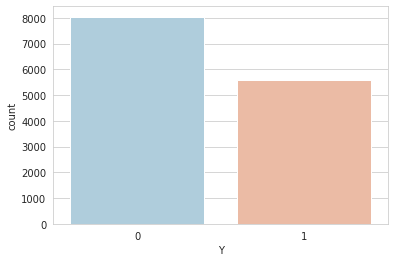

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x=dftrain['Y'],data=dftrain,palette='RdBu_r')

In [ ]:
train_imputed, X_test, y_train, y_test = train_test_split(imputed, ytrain, test_size=0.30, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
model_factory = [
 RandomForestClassifier(),
 ExtraTreesClassifier(),
 KNeighborsClassifier(),
 GradientBoostingClassifier(),
 AdaBoostClassifier(),
 GaussianNB(),
 SVC()
]

for model in model_factory:
  model.seed = 42

  mod = model.fit(train_imputed, y_train)
  y_pred = model.predict(X_test)
  scores = accuracy_score(y_test,y_pred)

  print(
      model.__class__.__name__, ' Score : ',
      scores, '\n'
  )

RandomForestClassifier  Score :  0.62793542074364 

ExtraTreesClassifier  Score :  0.6149706457925636 

KNeighborsClassifier  Score :  0.639187866927593 

GradientBoostingClassifier  Score :  0.6565557729941291 

AdaBoostClassifier  Score :  0.6465264187866928 

GaussianNB  Score :  0.6081213307240705 

SVC  Score :  0.6000489236790607 



In [ ]:
param = {
    'n_estimators':range(1,130),
        'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.5]
}
model = GradientBoostingClassifier()

In [ ]:
gs = GridSearchCV(model, param, refit=True, verbose=1)

In [ ]:
gs.fit(train_imputed,y_train)

Fitting 5 folds for each of 645 candidates, totalling 3225 fits


GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5],
                         'n_estimators': range(1, 130)},
             verbose=1)

In [ ]:
gs.best_params_

{'learning_rate': 0.2, 'n_estimators': 128}

In [ ]:
gs_pred = gs.predict(X_test)

In [ ]:
final = GradientBoostingClassifier(learning_rate=0.2,n_estimators=128)
final.fit(train_imputed,y_train)
final_pred = final.predict(X_test)

In [ ]:
accuracy_score(y_test,final_pred)

0.662426614481409

In [ ]:
accuracy_score(y_test, gs_pred)

0.662426614481409

In [ ]:
result_pred = final.predict(test_imputed)

In [ ]:
result_pred

array(['0', '0', '0', ..., '0', '1', '1'], dtype=object)

In [ ]:
result_pred = pd.DataFrame(result_pred)

In [ ]:
id = id[1:]
id.columns = "ID"
id.reset_index(inplace=True, drop=True)

In [ ]:
hasil = pd.concat([id,result_pred],axis=1)

In [ ]:
hasil

,0,0
0,3,0
1,5,0
2,6,0
3,10,0
4,17,0
...,...,...
5901,19515,0
5902,19525,0
5903,19528,0
5904,19531,1


In [ ]:
hasil = hasil[0:]
hasil.columns = ["ID","Y"]
hasil.reset_index(inplace=True, drop=True)

In [ ]:
hasil.to_csv("hasil.csv")